In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/MyDrive/112-2 LATIA/HW1/") # 切換目錄
!ls -l "/content/gdrive/MyDrive/112-2 LATIA/HW1/" # 列出目錄下的檔案
#!ls -l "自行填寫正確的路徑"

Mounted at /content/gdrive/
total 18
-rw------- 1 root root  4305 Mar 26 19:27 107-2.csv
-rw------- 1 root root 13398 Mar 26 20:39 HW1.ipynb


In [ ]:
import pandas as pd
csv_file ='./107-2.csv'
df = pd.read_csv(csv_file) # 讀取csv檔案
print(df.head())
#查看資料欄位資訊
print(df.info())

   學校代碼  區域  學校名稱  七年級男生數  七年級女生數  七年級班級數  八年級男生數  八年級女生數  八年級班級數  九年級男生數  \
0   675  東區  東峰國中      41      38       5      36      45       4      52   
1   676  東區  育英國中     117     108      10     121      96      10     142   
2   677  南區  崇倫國中     151     140      12     175     173      13     160   
3   678  南區  四育國中      88      58       7      76      57       6      86   
4   679  西區  向上國中     197     169      12     183     152      13     177   

   九年級女生數  九年級班級數  總班級數  
0      41       4    13  
1      88      10    30  
2     163      12    37  
3      90       9    22  
4     131      12    37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   學校代碼    68 non-null     int64 
 1   區域      68 non-null     object
 2   學校名稱    68 non-null     object
 3   七年級男生數  68 non-null     int64 
 4   七年級女生數  68 non-null     int64 
 5   七年級班級數  68 non-null  

# 1.台中哪間國中的總班級數最多?

In [ ]:
df2 = df[['總班級數', '學校名稱']]  # 選擇需要觀察的欄位
print("本資料集共有", len(df2), "筆紀錄")

# 找出具有最多班級數的國中
max_class_count = df2['總班級數'].max()  # 獲取最大班級數
df2_max_class = df2[df2['總班級數'] == max_class_count]  # 找出班級數等於最大值的列
max_class_schools = df2_max_class['學校名稱'].values  # 獲取具有最多班級數的國中名稱

print("具有最多班級數的國中為:", max_class_schools)
print("班級數為:", max_class_count)


本資料集共有 68 筆紀錄
具有最多班級數的國中為: ['居仁國中']
班級數為: 68


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-02 06:00:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.219.139, 172.217.219.138, 172.217.219.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.219.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-02 06:00:45--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  16.0MB/s    in 1.2s    

2024-04-02 06

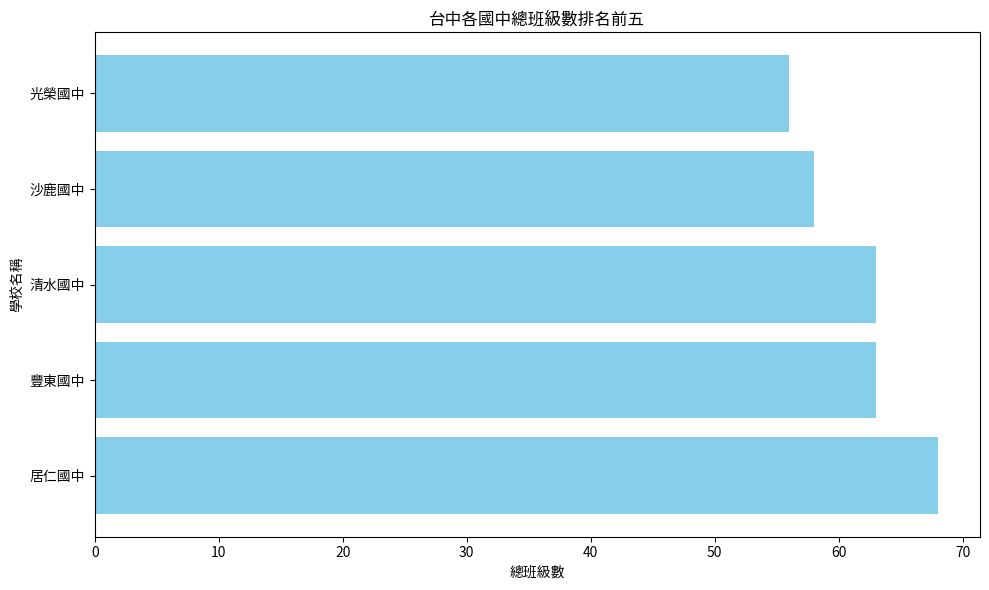

因學校數量太多，圖表會太亂，故僅跑總班級數前五多的學校，並從中可看出居仁國中總班級數最多


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設資料框為 df，包含欄位 '學校名稱' 和 '總班級數'

# 根據總班級數對資料進行排序
sorted_df = df.sort_values(by='總班級數', ascending=False)

# 取出排序後的前五筆資料顯示
top_school_names = sorted_df['學校名稱'].head(5)  # 取得前五名學校的名稱
top_total_classes = sorted_df['總班級數'].head(5)  # 取得前五名學校的總班級數

# 繪製水平條形圖
plt.figure(figsize=(10, 6))  # 設置圖形大小
plt.barh(top_school_names, top_total_classes, color='skyblue')  # 繪製水平條形圖
plt.xlabel('總班級數')  # 設置橫軸標籤
plt.ylabel('學校名稱')  # 設置縱軸標籤
plt.title('台中各國中總班級數排名前五')  # 設置圖形標題
plt.tight_layout()  # 調整布局
plt.show()  # 顯示圖形

print("因學校數量太多，圖表會太亂，故僅跑總班級數前五多的學校，並從中可看出居仁國中總班級數最多")

# 2.台中的國中總學生人數是多少?

In [ ]:
# 將各年級男生數加總
total_seventh_grade_boys = df['七年級男生數'].sum()
total_eighth_grade_boys = df['八年級男生數'].sum()
total_ninth_grade_boys = df['九年級男生數'].sum()

# 將各年級女生數加總
total_seventh_grade_girls = df['七年級女生數'].sum()
total_eighth_grade_girls = df['八年級女生數'].sum()
total_ninth_grade_girls = df['九年級女生數'].sum()

#計算總和
total_students=total_seventh_grade_boys+total_eighth_grade_boys+total_ninth_grade_boys+total_seventh_grade_girls+total_eighth_grade_girls+total_ninth_grade_girls
print("七年級男生數：", total_seventh_grade_boys)
print("八年級男生數：", total_eighth_grade_boys)
print("八年級男生數：", total_ninth_grade_boys)
print("七年級女生數：", total_seventh_grade_girls)
print("八年級女生數：", total_eighth_grade_girls)
print("九年級女生數：", total_ninth_grade_girls)
print("總學生人數：", total_students)

七年級男生數： 9562
八年級男生數： 9869
八年級男生數： 10135
七年級女生數： 8729
八年級女生數： 9240
九年級女生數： 9475
總學生人數： 57010


台中國中總學生人數為: 57010


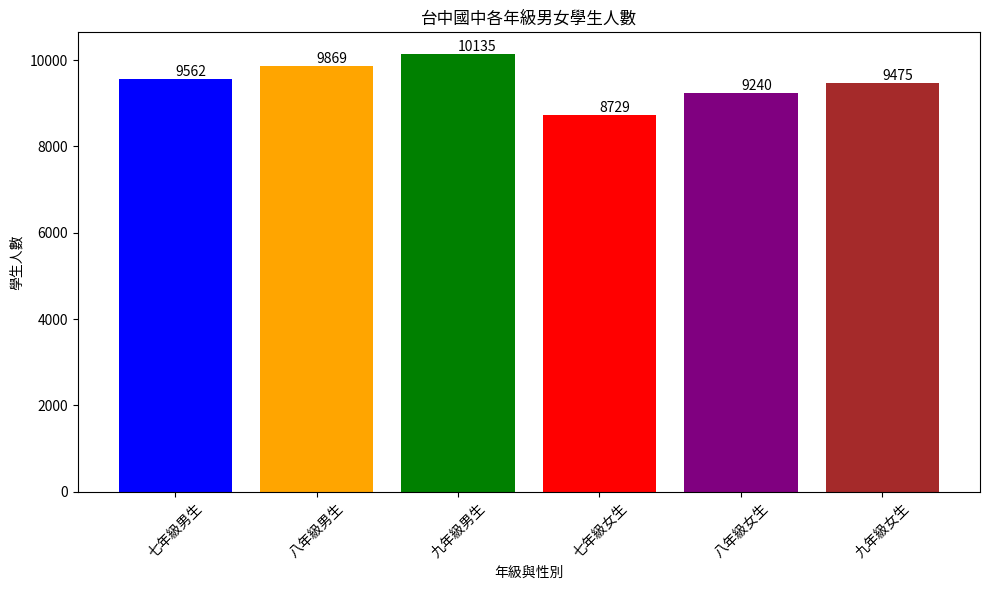

In [ ]:
import matplotlib.pyplot as plt

# 各年級男生數加總
total_seventh_grade_boys = df['七年級男生數'].sum()
total_eighth_grade_boys = df['八年級男生數'].sum()
total_ninth_grade_boys = df['九年級男生數'].sum()

# 各年級女生數加總
total_seventh_grade_girls = df['七年級女生數'].sum()
total_eighth_grade_girls = df['八年級女生數'].sum()
total_ninth_grade_girls = df['九年級女生數'].sum()

# 計算總學生人數
total_students = total_seventh_grade_boys + total_eighth_grade_boys + total_ninth_grade_boys + \
                total_seventh_grade_girls + total_eighth_grade_girls + total_ninth_grade_girls

# 顯示台中的國中總學生人數
print("台中的國中總學生人數為:", total_students)

# 建立年級和性別的列表
grades = ['七年級男生', '八年級男生', '九年級男生', '七年級女生', '八年級女生', '九年級女生']
totals = [total_seventh_grade_boys, total_eighth_grade_boys, total_ninth_grade_boys,
          total_seventh_grade_girls, total_eighth_grade_girls, total_ninth_grade_girls]

# 繪製長條圖
plt.figure(figsize=(10, 6))
bars = plt.bar(grades, totals, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# 在每個長條上方加上數值標籤
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xlabel('年級與性別')
plt.ylabel('學生人數')
plt.title('台中國中各年級男女學生人數')
plt.xticks(rotation=45)  # 將標籤旋轉45度，以避免文字重疊
plt.tight_layout()
plt.show()




# 3.台中學生男女比?

In [ ]:
# 將各年級男生數加總
total_seventh_grade_boys = df['七年級男生數'].sum()
total_eighth_grade_boys = df['八年級男生數'].sum()
total_ninth_grade_boys = df['九年級男生數'].sum()

# 將各年級女生數加總
total_seventh_grade_girls = df['七年級女生數'].sum()
total_eighth_grade_girls = df['八年級女生數'].sum()
total_ninth_grade_girls = df['九年級女生數'].sum()

#總男學生數
total_boys=total_seventh_grade_boys+total_eighth_grade_boys+total_ninth_grade_boys

#總女學生數
total_girls=total_seventh_grade_girls+total_eighth_grade_girls+total_ninth_grade_girls

#計算男女比
ratio=total_boys/total_girls*100

print("總男學生人數：", total_boys)
print("總女學生人數：", total_girls)
print(f'學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位


總男學生人數： 29566
總女學生人數： 27444
學生男女比：107.73210902200844 ≑ 107.73


總男學生人數： 29566
總女學生人數： 27444
學生男女比：107.73210902200844 ≑ 107.73


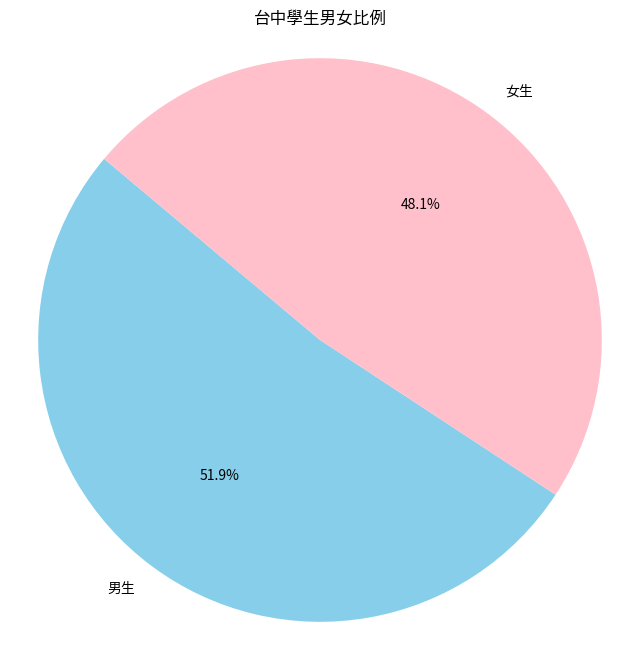

In [ ]:
import matplotlib.pyplot as plt

# 將各年級男生數加總
total_seventh_grade_boys = df['七年級男生數'].sum()
total_eighth_grade_boys = df['八年級男生數'].sum()
total_ninth_grade_boys = df['九年級男生數'].sum()

# 將各年級女生數加總
total_seventh_grade_girls = df['七年級女生數'].sum()
total_eighth_grade_girls = df['八年級女生數'].sum()
total_ninth_grade_girls = df['九年級女生數'].sum()

# 總男學生數
total_boys = total_seventh_grade_boys + total_eighth_grade_boys + total_ninth_grade_boys

# 總女學生數
total_girls = total_seventh_grade_girls + total_eighth_grade_girls + total_ninth_grade_girls

# 計算男女比
ratio = total_boys / total_girls * 100

print("總男學生人數：", total_boys)
print("總女學生人數：", total_girls)
print(f'學生男女比：{ratio} ≑ {round(ratio,2)}')  # 四捨五入至小數點後兩位

# 繪製圓餅圖
labels = ['男生', '女生']  # 定義圓餅圖的標籤
sizes = [total_boys, total_girls]  # 定義男女學生數量
colors = ['skyblue', 'pink']  # 定義男女學生的顏色

plt.figure(figsize=(8, 8))  # 設置圖形大小
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)  # 繪製圓餅圖
plt.title('台中學生男女比例')  # 設置圖表標題
plt.axis('equal')  # 設置坐標軸相等，讓圓餅圖呈現為圓形
plt.show()  # 顯示圖表


# 4.清水國中的總學生數是多少?

In [ ]:
school_name = "清水國中"

# 篩選出學校名稱為"清水國中"的資料列
school_data = df[df['學校名稱'] == school_name]

# 計算該學校的總學生數
total_students = school_data[['七年級男生數', '七年級女生數', '八年級男生數', '八年級女生數', '九年級男生數', '九年級女生數']].sum().sum()

print(f"{school_name}的總學生數是：{total_students}")

清水國中的總學生數是：1767


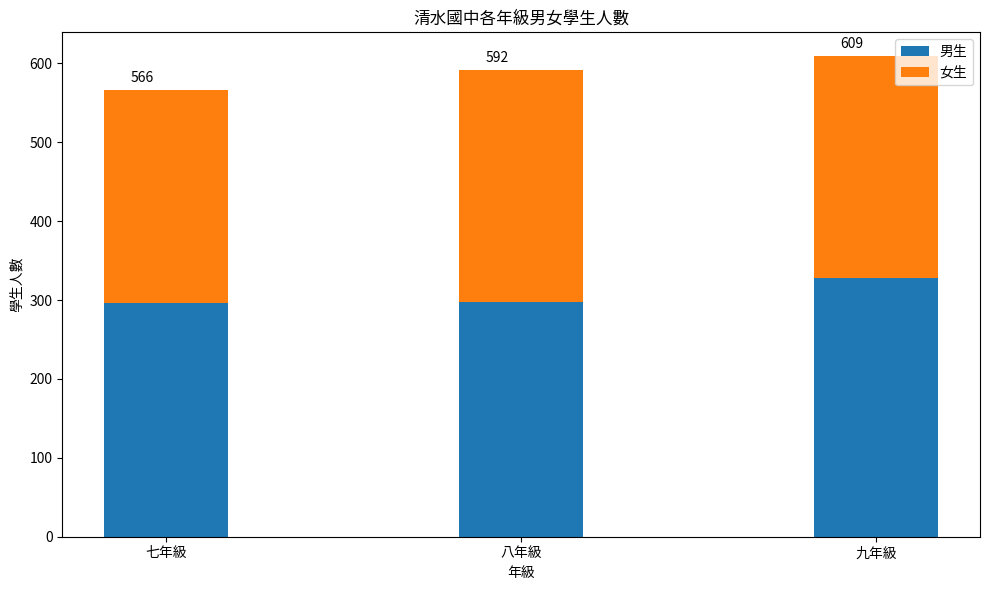

由上圖人數加總後知清水國中的總學生數是：1767


In [ ]:
import matplotlib.pyplot as plt

# 清水國中的學校名稱
school_name = "清水國中"

# 篩選出學校名稱為"清水國中"的資料列
school_data = df[df['學校名稱'] == school_name]

# 取出七年級到九年級男女學生數據
grade7_boys = school_data['七年級男生數'].values[0]
grade7_girls = school_data['七年級女生數'].values[0]
grade8_boys = school_data['八年級男生數'].values[0]
grade8_girls = school_data['八年級女生數'].values[0]
grade9_boys = school_data['九年級男生數'].values[0]
grade9_girls = school_data['九年級女生數'].values[0]

# 設置年級和性別標籤
grades = ['七年級', '八年級', '九年級']
boys = [grade7_boys, grade8_boys, grade9_boys]
girls = [grade7_girls, grade8_girls, grade9_girls]

# 設置長條圖寬度
bar_width = 0.35
index = range(len(grades))

# 繪製長條圖
plt.figure(figsize=(10, 6))  # 設置圖形大小
bar1 = plt.bar(index, boys, bar_width, label='男生')  # 繪製男生長條圖
bar2 = plt.bar(index, girls, bar_width, label='女生', bottom=boys)  # 繪製女生長條圖，並將起始位置設置在男生的頂部

# 在每個長條的正上方顯示相應的總學生數值
for i in range(len(grades)):
    plt.text(i - 0.1, boys[i] + girls[i] + 10, f'{boys[i] + girls[i]}', fontsize=10)  # 在每個長條的正上方顯示相應的總學生數值

# 添加標籤和標題
plt.xlabel('年級')  # 設置 x 軸標籤
plt.ylabel('學生人數')  # 設置 y 軸標籤
plt.title(f'{school_name}各年級男女學生人數')  # 設置圖表標題
plt.xticks(index, grades)  # 設置 x 軸刻度標籤
plt.legend(loc='upper right')  # 設置圖例位置為右上角
plt.tight_layout()  # 自動調整布局，使圖形內容填滿整個圖像區域

# 顯示圖表
plt.show()

# 計算總學生數
total_students = grade7_boys + grade7_girls + grade8_boys + grade8_girls + grade9_boys + grade9_girls
print(f"由上圖人數加總後知{school_name}的總學生數是：{total_students}")  # 輸出總學生數


# 5.位在西屯區的學校數量?分別有哪幾間?

In [ ]:
region = "西屯區"

# 篩選出區域為"西屯區"的資料列
schools_in_xitun = df[df['區域'] == region]

# 計算區域為"西屯區"的學校總數
total_schools_in_xitun = len(schools_in_xitun)

print("區域為西屯區的學校總數:", total_schools_in_xitun)
print("區域為西屯區的學校名稱:")
print(schools_in_xitun['學校名稱'].tolist())

區域為西屯區的學校總數: 5
區域為西屯區的學校名稱:
['安和國中', '至善國中', '中山國中', '漢口國中', '福科國中']


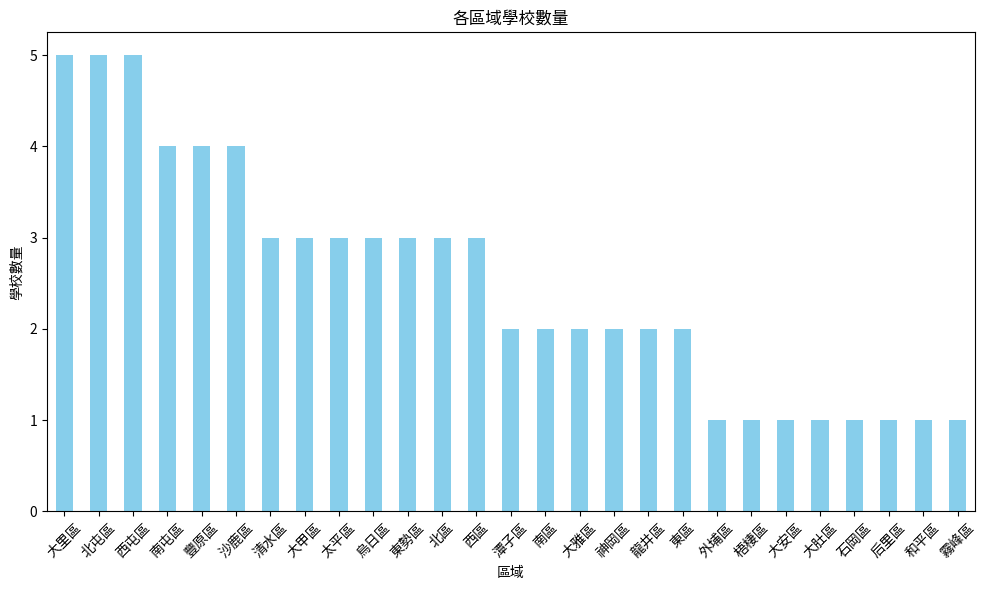

由圖可看出區域為西屯區的學校總數:5


In [ ]:
import matplotlib.pyplot as plt

# 計算各區域的學校數量
school_counts_by_region = df['區域'].value_counts()

# 繪製長條圖
plt.figure(figsize=(10, 6))  # 設置圖形大小
school_counts_by_region.plot(kind='bar', color='skyblue')  # 繪製長條圖，顏色設置為天藍色
plt.xlabel('區域')  # 設置 x 軸標籤
plt.ylabel('學校數量')  # 設置 y 軸標籤
plt.title('各區域學校數量')  # 設置圖表標題
plt.xticks(rotation=45)  # 將 x 軸標籤文字旋轉45度，以避免文字重疊
plt.tight_layout()  # 自動調整布局，使圖形內容填滿整個圖像區域
plt.show()  # 顯示圖表

print("由圖可看出區域為西屯區的學校總數:5")  # 輸出區域為西屯區的學校總數




# 6.位在豐原區所有學校的總男、女學生數是多少?

In [ ]:
region = "豐原區"

# 篩選出區域為"豐原區"的資料列
schools_in_fengyuan = df[df['區域'] == region]

# 計算豐原區所有學校的總女學生數
total_female_students = schools_in_fengyuan[['七年級女生數', '八年級女生數', '九年級女生數']].sum().sum()
total_male_students = schools_in_fengyuan[['七年級男生數', '八年級男生數', '九年級男生數']].sum().sum()

print("豐原區所有學校的總女學生數:", total_female_students)
print("豐原區所有學校的總男學生數:", total_male_students)

豐原區所有學校的總女學生數: 2318
豐原區所有學校的總男學生數: 2555


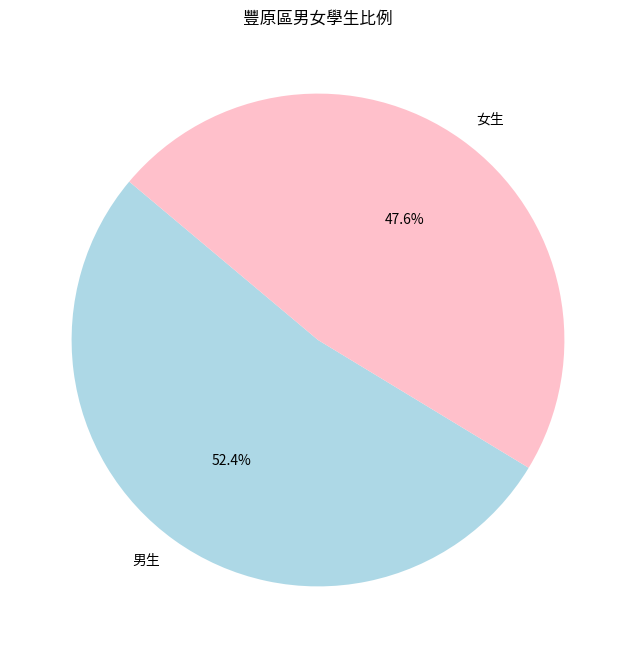

In [ ]:
import matplotlib.pyplot as plt

# 設置標籤和數值
labels = ['男生', '女生']
sizes = [total_male_students, total_female_students]
colors = ['lightblue', 'pink']

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('豐原區男女學生比例')

# 顯示圖表
plt.show()

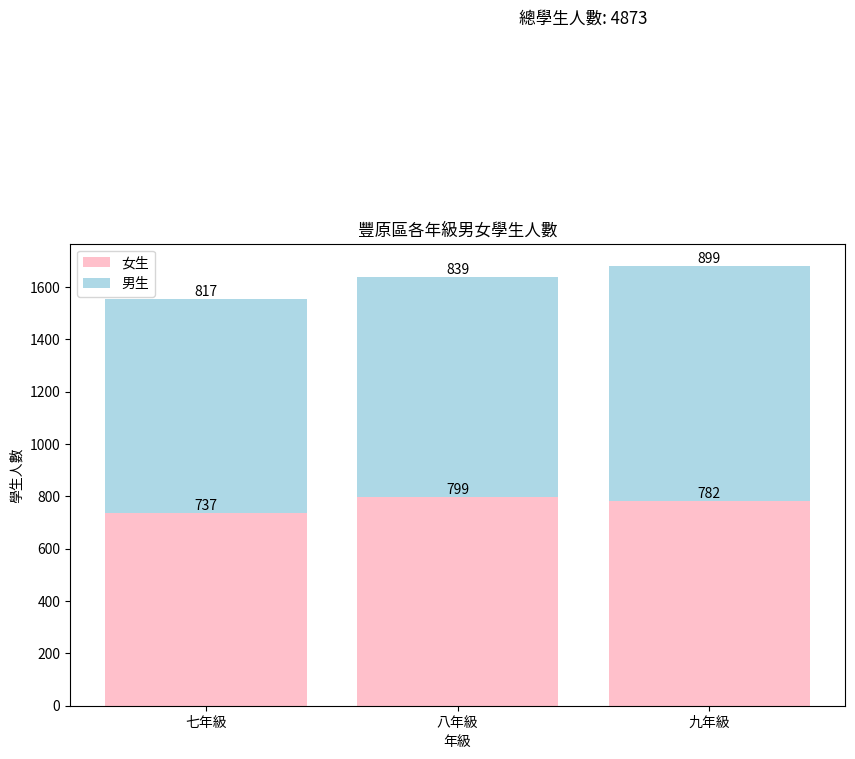

這樣便可由圖看出豐原區各年級男女學生數量，總女學生數: 2318，總男學生數: 2555


In [ ]:
import matplotlib.pyplot as plt

# 設置年級和性別標籤
grades = ['七年級', '八年級', '九年級']

# 計算男女學生人數的總和
total_female_students = sum(female_students)
total_male_students = sum(male_students)
total_students = total_female_students + total_male_students

# 繪製長條圖
plt.figure(figsize=(10, 6))
bars1 = plt.bar(grades, female_students, color='pink', label='女生')
bars2 = plt.bar(grades, male_students, bottom=female_students, color='lightblue', label='男生')

# 在每個長條上方顯示數量
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, height1, int(height1), ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2, height1 + height2, int(height2), ha='center', va='bottom')

# 在圖的上方中心位置顯示總學生人數
plt.text(1.5, max(total_female_students, total_male_students) + 50, f'總學生人數: {total_students}', ha='center', fontsize=12)

# 添加標籤和標題
plt.xlabel('年級')
plt.ylabel('學生人數')
plt.title('豐原區各年級男女學生人數')
plt.legend()

# 顯示圖表
plt.show()
print("這樣便可由圖看出豐原區各年級男女學生數量，總女學生數: 2318，總男學生數: 2555")

# 7.爽文國中各年級男女生人數分佈

In [ ]:
# 學校名稱為爽文國中
school_name = "爽文國中"

# 篩選出學校名稱為爽文國中的資料列
school_data = df[df['學校名稱'] == school_name]

# 取出七年級到九年級男女學生數據
grade7_boys = school_data['七年級男生數'].values[0]
grade7_girls = school_data['七年級女生數'].values[0]
grade8_boys = school_data['八年級男生數'].values[0]
grade8_girls = school_data['八年級女生數'].values[0]
grade9_boys = school_data['九年級男生數'].values[0]
grade9_girls = school_data['九年級女生數'].values[0]

# 計算各年級男女學生人數總和
total_grade7_students = grade7_boys + grade7_girls
total_grade8_students = grade8_boys + grade8_girls
total_grade9_students = grade9_boys + grade9_girls

# 計算總男生人數和總女生人數
total_male_students = grade7_boys + grade8_boys + grade9_boys
total_female_students = grade7_girls + grade8_girls + grade9_girls

# 輸出結果
print(f"{school_name}各年級男女生人數分佈:")
print("七年級男生人數:", grade7_boys)
print("七年級女生人數:", grade7_girls)
print("八年級男生人數:", grade8_boys)
print("八年級女生人數:", grade8_girls)
print("九年級男生人數:", grade9_boys)
print("九年級女生人數:", grade9_girls)
print("總男生人數:", total_male_students)
print("總女生人數:", total_female_students)


爽文國中各年級男女生人數分佈:
七年級男生人數: 231
七年級女生人數: 219
八年級男生人數: 219
八年級女生人數: 205
九年級男生人數: 201
九年級女生人數: 205
總男生人數: 651
總女生人數: 629


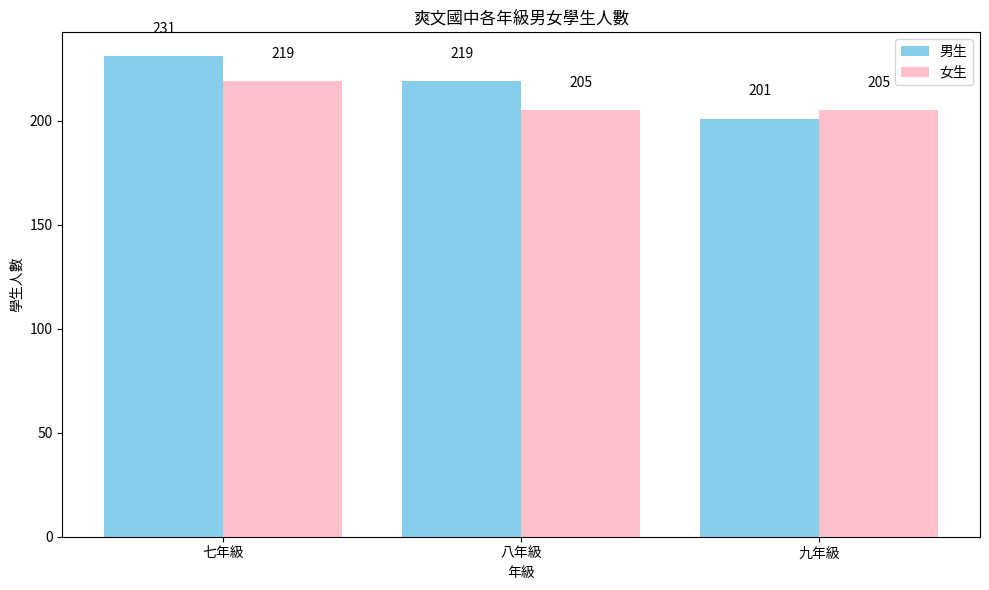

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 學校名稱為爽文國中
school_name = "爽文國中"

# 篩選出學校名稱為爽文國中的資料列
school_data = df[df['學校名稱'] == school_name]

# 取出七年級到九年級男女學生數據
grade7_boys = school_data['七年級男生數'].values[0]
grade7_girls = school_data['七年級女生數'].values[0]
grade8_boys = school_data['八年級男生數'].values[0]
grade8_girls = school_data['八年級女生數'].values[0]
grade9_boys = school_data['九年級男生數'].values[0]
grade9_girls = school_data['九年級女生數'].values[0]

# 設置年級標籤
grades = ['七年級', '八年級', '九年級']
index = np.arange(len(grades))
bar_width = 0.4

# 繪製男生長條圖
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, [grade7_boys, grade8_boys, grade9_boys], width=bar_width, color='skyblue', label='男生')

# 在每個長條的上方顯示相應的數值
for i in range(len(grades)):
    plt.text(index[i] - bar_width/2, [grade7_boys, grade8_boys, grade9_boys][i] + 10, f'{[grade7_boys, grade8_boys, grade9_boys][i]}', ha='center', va='bottom')

# 繪製女生長條圖
plt.bar(index + bar_width/2, [grade7_girls, grade8_girls, grade9_girls], width=bar_width, color='pink', label='女生')

# 在每個長條的上方顯示相應的數值
for i in range(len(grades)):
    plt.text(index[i] + bar_width/2, [grade7_girls, grade8_girls, grade9_girls][i] + 10, f'{[grade7_girls, grade8_girls, grade9_girls][i]}', ha='center', va='bottom')

# 添加標籤和標題
plt.xlabel('年級')
plt.ylabel('學生人數')
plt.title(f'{school_name}各年級男女學生人數')
plt.xticks(index, grades)
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()
